# **BUSINESS UNDERSTANDING.**

Customer churn refers to when a customer stops using a company's services. In the telcommunications industry, this is a critical issue as it directly impacts the company's revenue and growth. For SyriaTeL, it is important to understand the churn rate to be able to manage the customer base to ensure long-term profitability.

**Business Problem Statement**

 SyriaTel is facing a level of customer turnover, resulting in substantial revenue decline. This study seeks to address this challenge by analysing the different factors that contribute to this challenge. Ultimately, the goal is to forecast which customers are likely to discontinue their service and deploy effective retention measures to mitigate this rate. We will be builiding a classification system and to evaluate the performance of the classifier we will use classification metrics including accuarcy, recall, f1score and precision.

**Objectives**

1. Create different models to discover the patterns which lead to a high rate of customer churn.
2. Develop targeted retention strategies to enhance customer loyalty.

# **DATA UNDERSTANDING.**

We first import the Churn dataset that we will be using for this project.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [3]:

data = pd.read_csv(r"C:\Users\Administrator\Downloads\bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


COLUMN NAMES AND DESCRIPTION OF THE DATASET.

The dataset contains data on the customers of a SyriaTel company.
Each row represents a customer and the columns contain customer’s attributes which are described in the following:
- state: the state the user lives in
- account length: the number of days the user has this account
- area code: the code of the area the user lives in
- phone number: the phone number of the user
- international plan: true if the user has the international plan.
- voice mail plan: true if the user has the voice mail plan.
- number vmail messages: the number of voice mail messages the user has sent.
- total day minutes: total number of minutes the user has been in calls during the day.
- total day calls: total number of calls the user has done during the day.
- total day charge: total amount of money the user was charged by  SyriaTel company for calls during the day.
- total eve minutes: total number of minutes the user has been in calls during the evening.
- total eve calls: total number of calls the user has done during the evening.
- total eve charge: total amount of money the user was charged by  SyriaTel company for calls during the evening.
- total night minutes: total number of minutes the user has been in calls during the night.
- total night calls: total number of calls the user has done during the night.
- total night charge: total amount of money the user was charged by SyriaTel company for calls during the night.
- total intl minutes: total number of minutes the user has been in international calls.
- total intl calls: total number of international calls the user has done.
- total intl charge: total amount of money the user was charged by the Telecom company for international calls.
- customer service calls: number of customer service calls the user has done.
- churn: true if the user terminated the contract, or false the user is still using the company's services.

In [4]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
data.shape

(3333, 21)

The dataset has 3333 rows and 21 columns .It comprised of different data types i.e integer, floats, boolean and strings.

# **DATA CLEANING**

Data cleaning involves the process of identifying and resolving issues related to the quality of the dataset. Its primary objective is to ensure that the data is accurate, consistent, and devoid of errors. 

In [7]:
#creating a copy of the dataset first.
df = data.copy()
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#Checking for missing values.
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset has no missing values.

We will then change the column names and make them into titles.

In [9]:
#making the columns into titles and changing
#some of the column names to full column names.

df.rename(columns={
    'total eve minutes': 'total evening minutes',
    'number vmail messages': 'number of voicemail messages',
    'total eve charge': 'total evening charge',
    'total eve calls' : 'total evening calls',
    'total intl calls' : ' total international calls',
    'total intl charge' : 'total international charge',
    'total intl minutes' : 'total international minutes'
}, inplace=True)

In [10]:
df.columns = df.columns.str.title()


In [11]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone Number',
       'International Plan', 'Voice Mail Plan', 'Number Of Voicemail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total Day Charge',
       'Total Evening Minutes', 'Total Evening Calls', 'Total Evening Charge',
       'Total Night Minutes', 'Total Night Calls', 'Total Night Charge',
       'Total International Minutes', ' Total International Calls',
       'Total International Charge', 'Customer Service Calls', 'Churn'],
      dtype='object')

Checking for duplicate values.

In [12]:
df.duplicated().any

<bound method Series.any of 0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool>

There are no duplicates in this dataset

We will then check for placeholders in the dataset.

 These denote missing values in the dataset. Common placeholders used are "",'N/A', 'NULL','?', 'nan', 'unknown'. Identifying placeholders will helps us to improve model performance and get more accurate analysis.

In [13]:
# Define a list of potential placeholder values
common_placeholders = ["", "NA", "N/A", "nan", "none", "null", "?", "unknown", "missing"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df.columns:
    unique_values = df[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No placeholders found in the DataFrame.")


No placeholders found in the DataFrame.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         3333 non-null   object 
 1   Account Length                3333 non-null   int64  
 2   Area Code                     3333 non-null   int64  
 3   Phone Number                  3333 non-null   object 
 4   International Plan            3333 non-null   object 
 5   Voice Mail Plan               3333 non-null   object 
 6   Number Of Voicemail Messages  3333 non-null   int64  
 7   Total Day Minutes             3333 non-null   float64
 8   Total Day Calls               3333 non-null   int64  
 9   Total Day Charge              3333 non-null   float64
 10  Total Evening Minutes         3333 non-null   float64
 11  Total Evening Calls           3333 non-null   int64  
 12  Total Evening Charge          3333 non-null   float64
 13  Tot

In [15]:
#Drop the phone number column.
df = df.drop(['Phone Number'],axis=1)

We drop the phone number column since it is a unique identifier for each customer , it does not provide any meaningeful information about a customer's
characteristics.

We will change the Area Code column datatype from integer to object. It should be considered as a categorical column since it is a nominal variable.
Also convert the churn column to an integer. And also change the datatype of churn from boolean to int.

In [16]:
df['Area Code'] = df['Area Code'].astype(str)

In [17]:
df['Churn'] = df['Churn'].astype(int)

Let us check for outliers on numeric columns. We will visualize the data to see its distribution. We will then handle the outliers as they will significantly affect the models' performance.

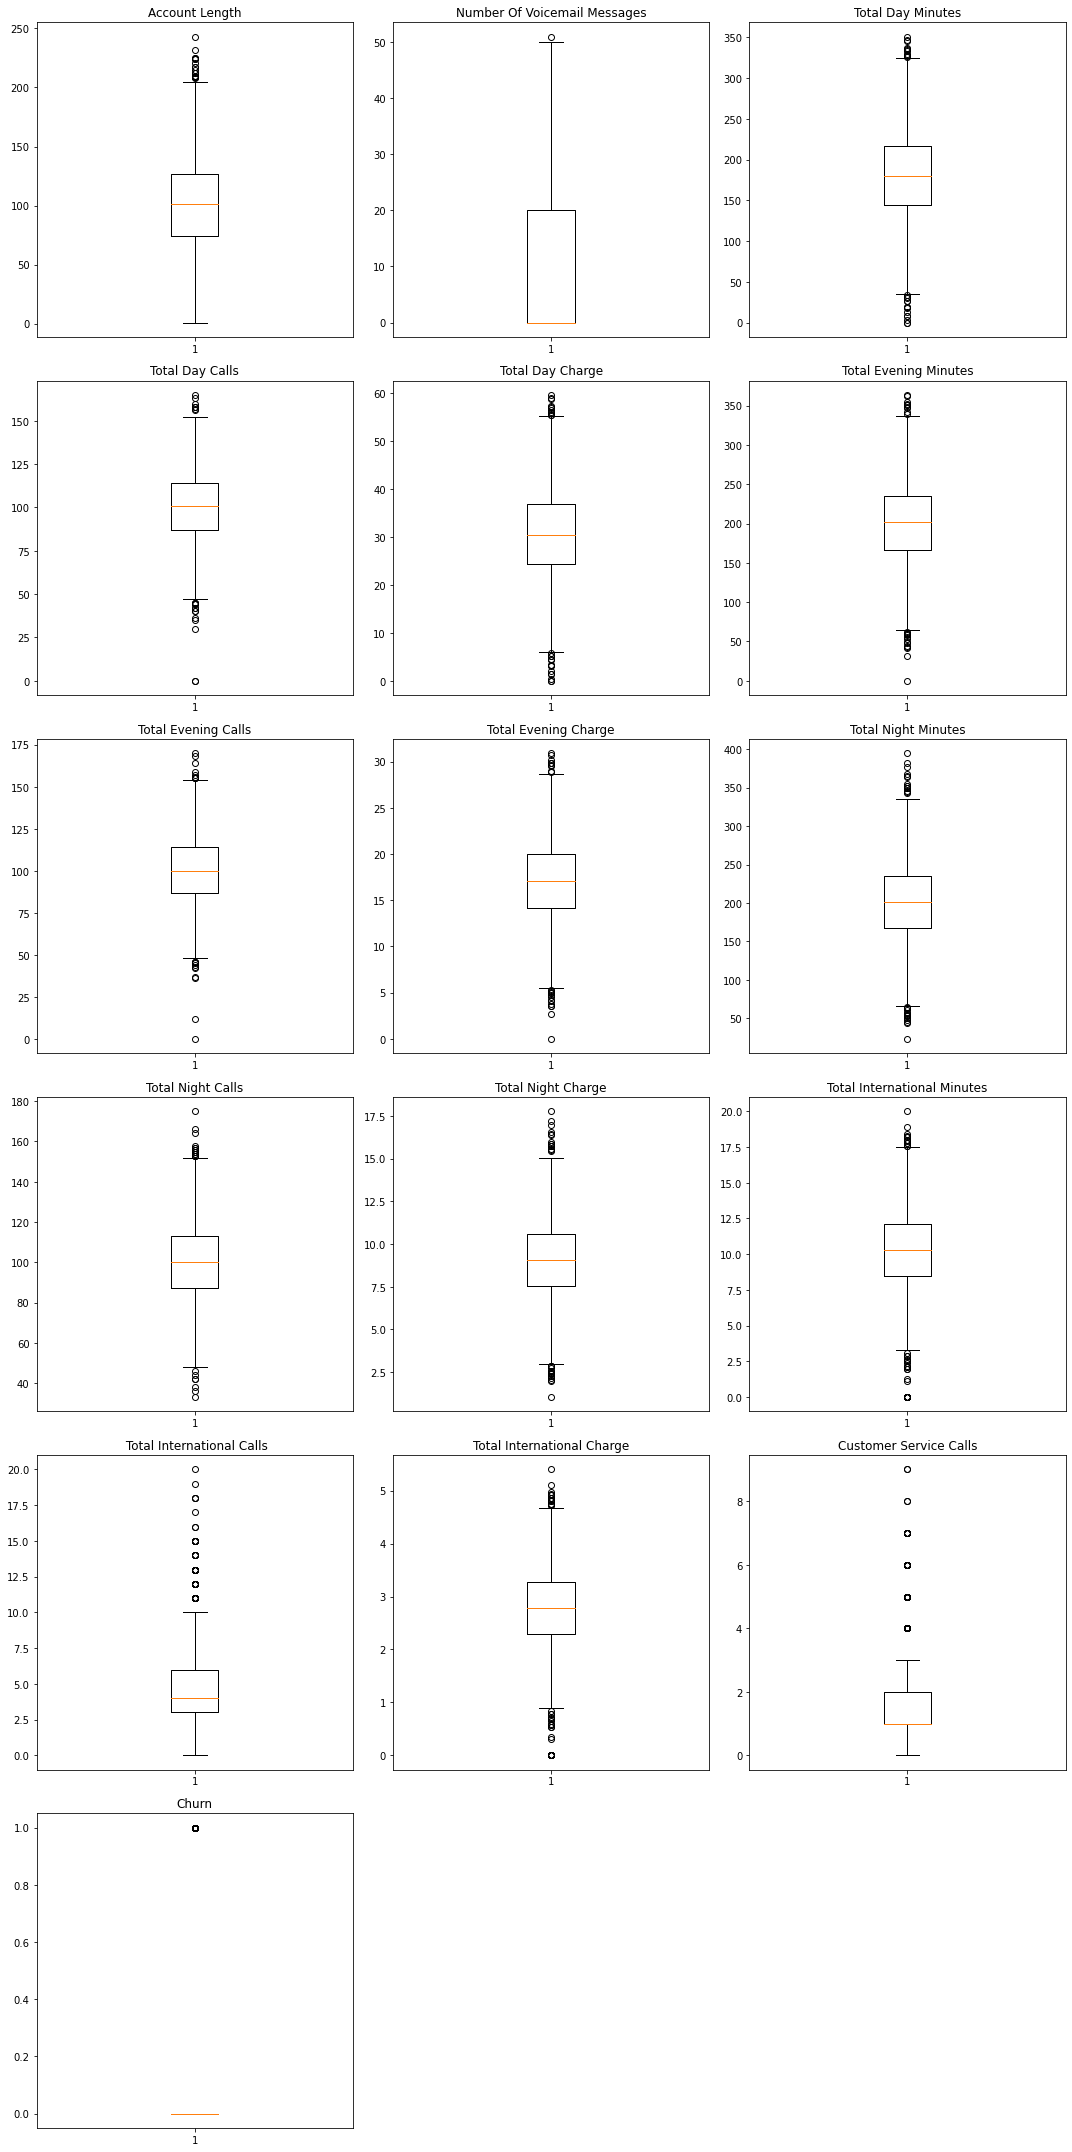

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

We will use the z-score method to identify rows which have outliers.

In [19]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Set threshold for Z-scores
threshold = 3

# Identify rows with any Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Print the identified outliers
print("Outliers detected using Z-score:")
print(df[outliers])

Outliers detected using Z-score:
     State  Account Length Area Code International Plan Voice Mail Plan  \
22      AZ             130       415                 no              no   
32      LA             172       408                 no              no   
41      MD             135       408                yes             yes   
58      WI              68       415                 no              no   
115     ME              36       510                yes             yes   
...    ...             ...       ...                ...             ...   
3247    OK             146       510                 no              no   
3275    NY             120       510                 no             yes   
3290    CA             127       510                 no              no   
3291    MI             119       510                yes             yes   
3310    NY              94       415                 no              no   

      Number Of Voicemail Messages  Total Day Minutes  Total Day C

In [20]:
#Removing the outliers.
df1 = df[~outliers]

print("DataFrame after removing outliers:")
print(df1)

DataFrame after removing outliers:
     State  Account Length Area Code International Plan Voice Mail Plan  \
0       KS             128       415                 no             yes   
1       OH             107       415                 no             yes   
2       NJ             137       415                 no              no   
3       OH              84       408                yes              no   
4       OK              75       415                yes              no   
...    ...             ...       ...                ...             ...   
3328    AZ             192       415                 no             yes   
3329    WV              68       415                 no              no   
3330    RI              28       510                 no              no   
3331    CT             184       510                yes              no   
3332    TN              74       415                 no             yes   

      Number Of Voicemail Messages  Total Day Minutes  Total Day

In [21]:
df1.shape

(3169, 20)

After handling the outliers, we remain with 3169 rows, 164 rows removed.

# **EXPLORATORY DATA ANALYSIS**

Let us see the statistical overview of the data.

In [22]:
df1.describe()

,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total International Calls,Total International Charge,Customer Service Calls,Churn
count,3169.000000,3169.000000,3169.000000,3169.00000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,100.856737,7.974440,180.280120,100.60650,30.648157,201.086904,100.195014,17.092603,200.924361,100.023982,9.041682,10.309340,4.367939,2.784033,1.513411,0.139476
std,39.474815,13.586481,53.835965,19.72475,9.152086,50.080338,19.614413,4.256827,49.990627,19.405317,2.249643,2.665854,2.156224,0.719748,1.215649,0.346497
min,1.000000,0.000000,17.600000,42.00000,2.990000,49.200000,42.000000,4.180000,50.100000,42.000000,2.250000,2.000000,1.000000,0.540000,0.000000,0.000000
25%,74.000000,0.000000,144.000000,87.00000,24.480000,166.800000,87.000000,14.180000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,179.900000,101.00000,30.580000,201.400000,100.000000,17.120000,201.100000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,19.000000,217.000000,114.00000,36.890000,235.100000,114.000000,19.980000,235.600000,113.000000,10.600000,12.100000,6.000000,3.270000,2.000000,0.000000
max,217.000000,49.000000,337.400000,160.00000,57.360000,351.600000,159.000000,29.890000,352.500000,158.000000,15.860000,18.400000,11.000000,4.970000,5.000000,1.000000


The rows provide descriptive statistics including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each column in the dataset. We will then perform various analysis i.e univariate, bivariate and multivariate.

**Univariate Analysis.**

We will first look at the distribution of our target variable which Churn.

0    2727
1     442
Name: Churn, dtype: int64

0    86.052382
1    13.947618
Name: Churn, dtype: float64


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

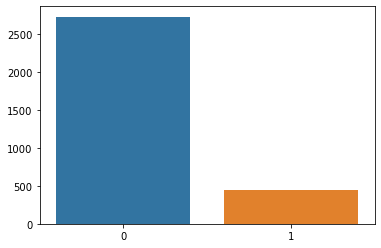

In [23]:
y = df1["Churn"].value_counts()
churn_percentage = y / len(df1) * 100
print(y)
print("")
print(churn_percentage)
sns.barplot(y.index, y.values)

This shows approximately 86% of the customers have not terminated the contract. We have a calss imbalance for the target variable which could lead to biased predictions towards the no churn category. We will investigate into the use to oversampling when building the models.

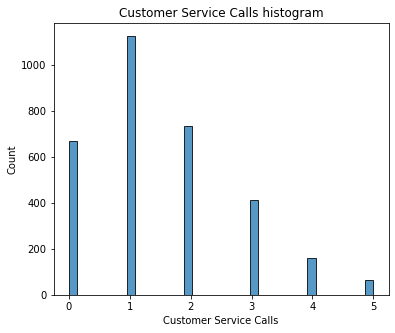

In [24]:
#Distribution of the customer service calls.
plt.figure(figsize=(6, 5))

# Price boxplot

sns.histplot(x=df1['Customer Service Calls'])
plt.title('Customer Service Calls histogram')


plt.show()

In [25]:
df1["Customer Service Calls"].value_counts()

1    1127
2     734
0     670
3     414
4     161
5      63
Name: Customer Service Calls, dtype: int64

Over 1000 customers have made 1 customer service call to the company. This is quite  a huge number and might signify that there is one common problem. 
0 customer service calls indicate that 670 customers are satisfied with the company's services. Although it is still a lower value compared to the customers who called once or twice.


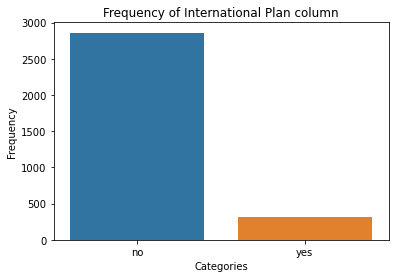

In [26]:
#showing the distribution of the international column.
sns.countplot(x='International Plan', data=df1)
plt.title('Frequency of International Plan column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

Less than 500 people have the international plan while almost 3000 people do not have the international plan.

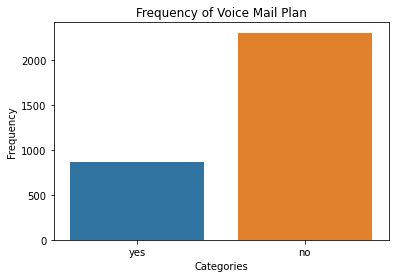

In [27]:
#Visualizing the distribution of the Voice Mail plan.
sns.countplot(x='Voice Mail Plan', data=df1)
plt.title('Frequency of Voice Mail Plan')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

More than 2000 customers do not have the Voice Mail Plan while less than 1000 people have the voice mail plan.

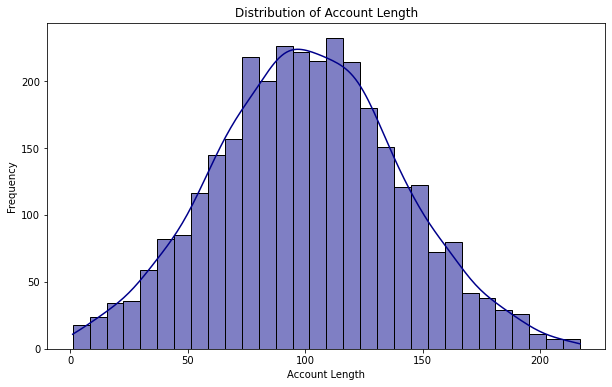

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Account Length'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.show()

It shows that its distribution is a Gaussian distribution meaning it is symmetrical around the mean showing that data near the mean are more frequent in occurrence than data far from the mean.

**Bivariate analysis.**

We will visualize the relationship between Churn and State to see which states have the most and least churn rates.

<AxesSubplot:xlabel='State'>

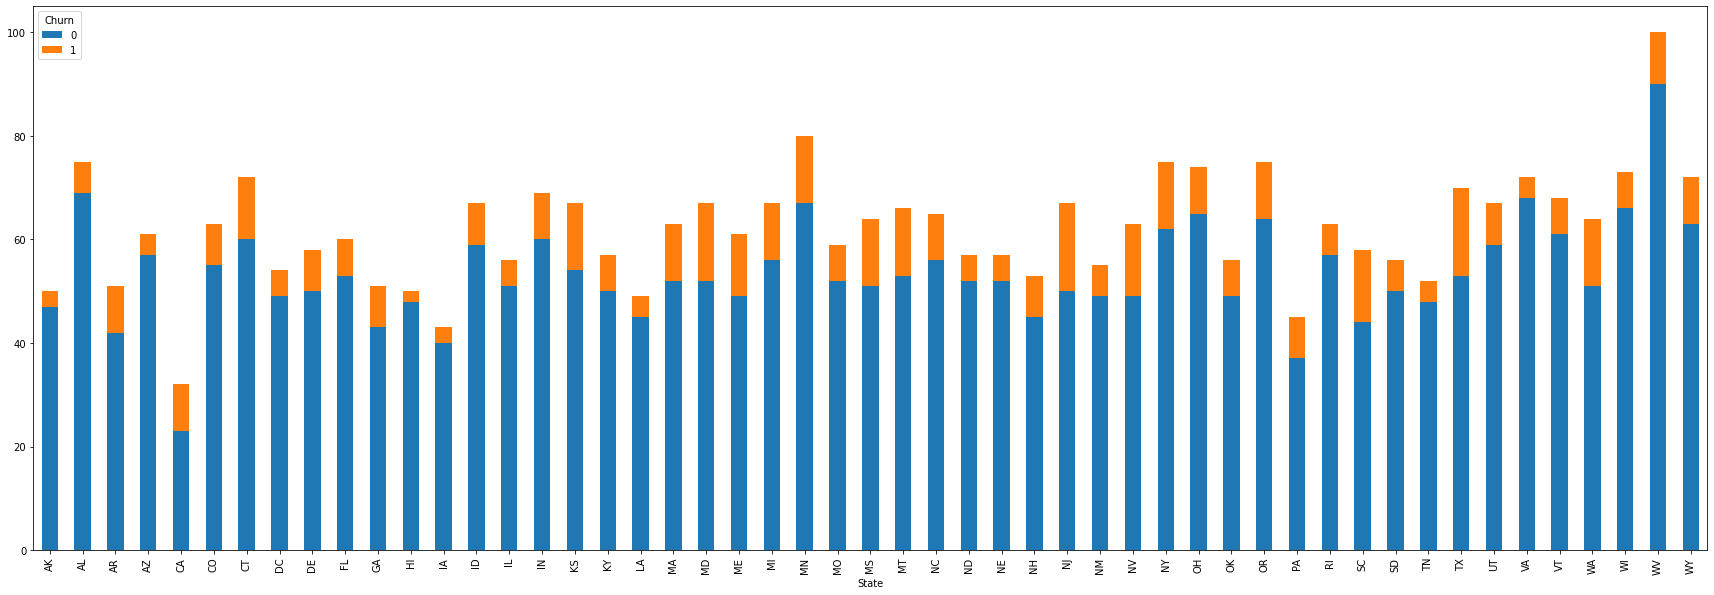

In [29]:
df1.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

The above graph shows there are states with less rates of churn like AK, IA, LA and HI while there are states with higher rates of churn like TX, SC and NY.

Relationship between Churn and Account Length.

In [30]:
#calculating he median position for each churn category.
medians = df1.groupby('Churn')['Account Length'].median()
print("Medians:\n", medians)

Medians:
 Churn
0    100.0
1    102.5
Name: Account Length, dtype: float64


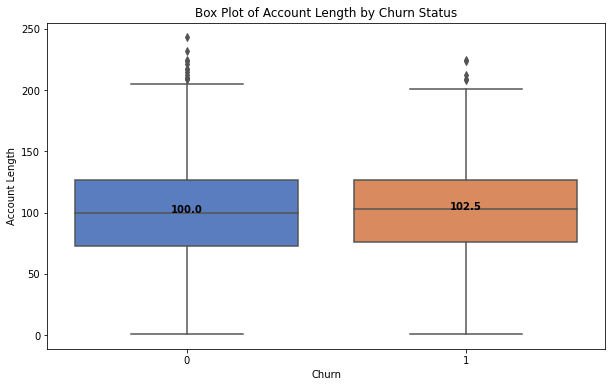

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='Account Length', data=df, palette='muted')

# Annotate the medians on the box plot
for tick, label in enumerate(ax.get_xticklabels()):
    x_position = tick
    y_position = medians[tick]
    ax.text(x_position, y_position, f'{y_position:.1f}', 
            horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Box Plot of Account Length by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.show()

There is a slight difference in the medians of the churn categories. The customers who churn have a median of 102.5, which shows that the customers with longer account lengths stop usingthe company's services. But when we look at the outliers, the category false has more outliers which shows a higher variability in the account length, showing that the values are less consistent.

Relationship between Churn and International plan.

<AxesSubplot:xlabel='International Plan'>

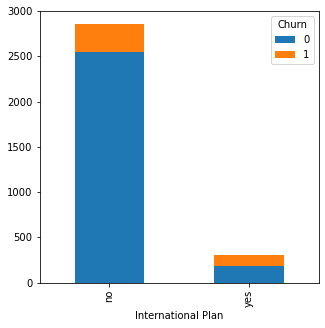

In [32]:
df1.groupby(["International Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Both with or without the international plan have churn rates. Interestingly, those without the international plan have a much higher rate of churn compared to those with an international plan.

Relationship between churn and voice mail plan

<AxesSubplot:xlabel='Voice Mail Plan'>

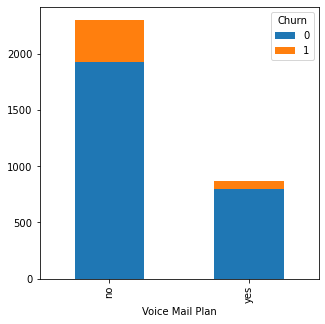

In [33]:
df1.groupby(["Voice Mail Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Almost similar to the previous graph, the customers without a voice mail plan have a higher rate of churn compared to those with a voicemail plan.

**Multivariate analysis.**

Creating a heat map to show correlation of the entire dataset,in which high correlations are coloured more to the red and lower ones more to purple.

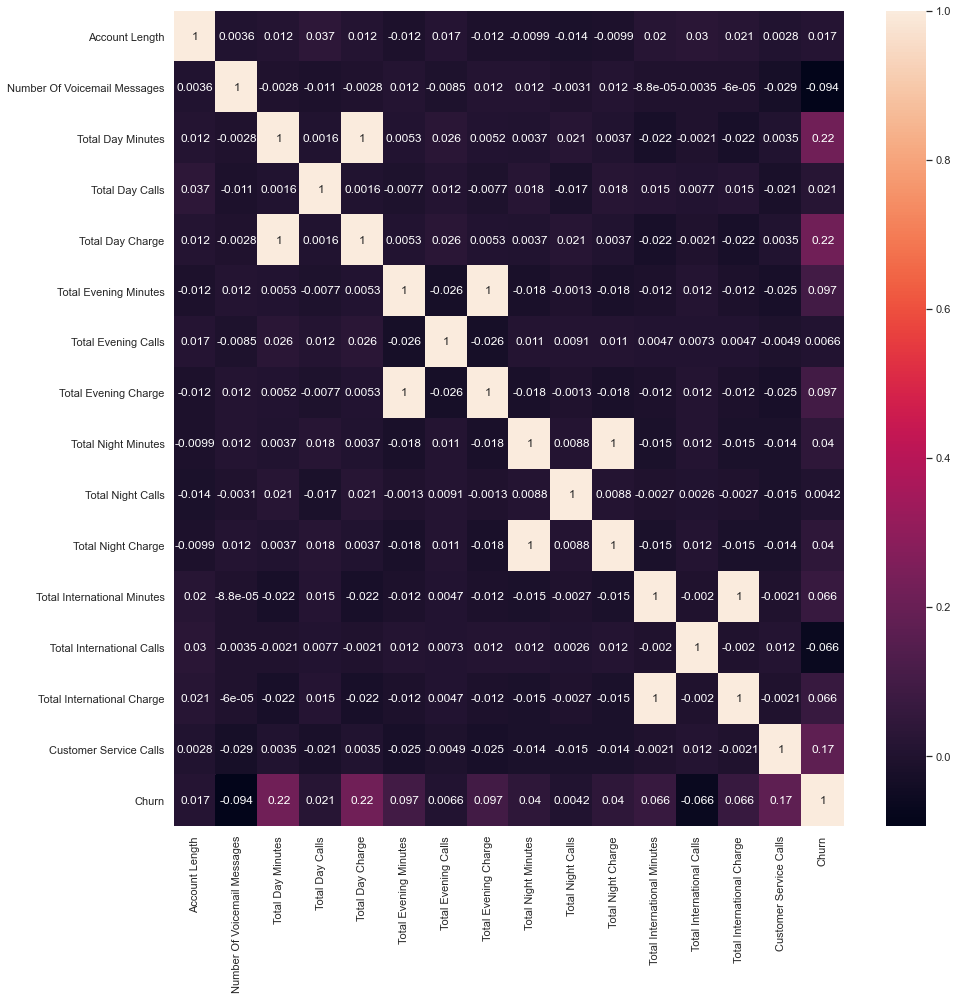

In [34]:
sns.set(rc={'figure.figsize':(15, 15)})
#Use the .heatmap method to depict the relationship visually

sns.heatmap(df1.corr(), annot=True, annot_kws={"size": 12})
plt.show()

From the above , we can see the columns that highly correlated to churn are Customer Service Calls, total day minutes and total day charge.

Let us now visualize the correlation between different columns.

<Figure size 864x720 with 0 Axes>

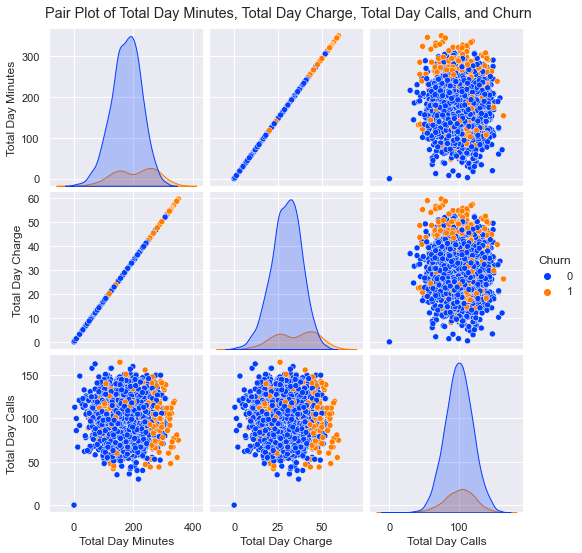

In [35]:
#visualizing the relationship between total day minutes, total day charge , total day calls and churn
plt.figure(figsize=(12, 10))
sns.pairplot(df, vars=['Total Day Minutes', 'Total Day Charge', 'Total Day Calls'], hue='Churn', palette='bright')
plt.suptitle('Pair Plot of Total Day Minutes, Total Day Charge, Total Day Calls, and Churn', y=1.02)
plt.show()

We see that there is a linear relationship between total day charge and total day minutes charge, in relation with the churn rate the higher day charge show more customers tend to leave the company. The cluster points show higher churn rate when the total day minutes and total day charge increase.

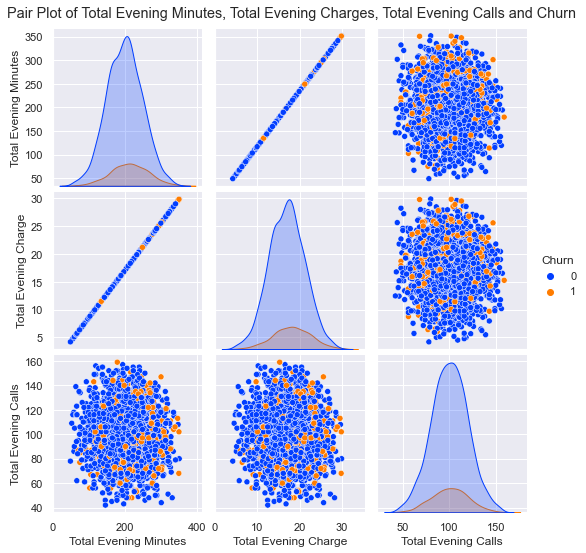

In [36]:
#visualizing the relationship between total evening minutes, total evening charge,total evening calls and churn
sns.pairplot(df1, vars=['Total Evening Minutes', 'Total Evening Charge','Total Evening Calls'], hue='Churn', palette='bright', diag_kind='kde')
plt.suptitle('Pair Plot of Total Evening Minutes, Total Evening Charges, Total Evening Calls and Churn', y=1.02)
plt.show()

There is a clear linear relationship between the total evening charges and total evening minutes. The cluster points show a low churn rate and seem to be unevely distributed. It spread across the different columns.

<Figure size 864x720 with 0 Axes>

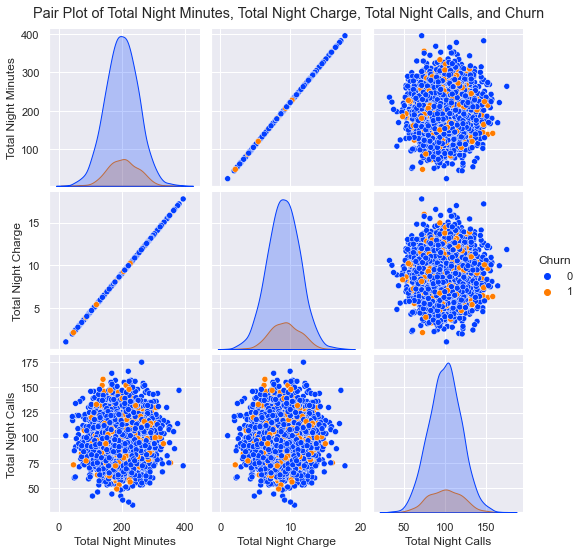

In [37]:
#visualizing the relationship betweeen total night calls, total night charge, total night minutes and churn
plt.figure(figsize=(12, 10))
sns.pairplot(df, vars=['Total Night Minutes', 'Total Night Charge', 'Total Night Calls'], hue='Churn', palette='bright')
plt.suptitle('Pair Plot of Total Night Minutes, Total Night Charge, Total Night Calls, and Churn', y=1.02)
plt.show()

There is a clear linear relationship between the total night charges and total night minutes. The cluster points show a low churn rate and seem to be unevely distributed. It spread across the different columns.

**Feature Engineering.**

We will create new columns from different columns.

In [38]:
#We will create new columns namely, total calls, average call duration, customer tenure and total charges. Customer
#tenure refers to the average time a customer stays in business with a company. It will be calculated in months.
df1.loc[:, 'Total Charges'] = df1['Total Day Charge'] + df1['Total Evening Charge'] + df1['Total Night Charge'] + df1['Total International Charge']
df1.loc[:, 'Total Calls'] = df1['Total Day Calls'] + df1['Total Evening Calls'] + df1['Total Night Calls'] + df1[' Total International Calls']
df1.loc[:, 'Average Call Duration'] = (df1['Total Day Minutes'] + df1['Total Evening Minutes'] + df1['Total Night Minutes'] + df1['Total International Minutes'])/4
df1.loc[:, 'Customer Tenure'] = df1['Account Length'] / 30


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         3169 non-null   object 
 1   Account Length                3169 non-null   int64  
 2   Area Code                     3169 non-null   object 
 3   International Plan            3169 non-null   object 
 4   Voice Mail Plan               3169 non-null   object 
 5   Number Of Voicemail Messages  3169 non-null   int64  
 6   Total Day Minutes             3169 non-null   float64
 7   Total Day Calls               3169 non-null   int64  
 8   Total Day Charge              3169 non-null   float64
 9   Total Evening Minutes         3169 non-null   float64
 10  Total Evening Calls           3169 non-null   int64  
 11  Total Evening Charge          3169 non-null   float64
 12  Total Night Minutes           3169 non-null   float64
 13  Tot

**Pre-processing data.**

This includes splitting the dataset, normalize/standardize the data, performing one hot encoding and label encoding and addressing multicollinearity.

In [40]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn', axis=1)  
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer



# Label encode the State and Are Code  columns
le = LabelEncoder()
X_train['Encoded State'] = le.fit_transform(X_train['State'])
X_test['Encoded State'] = le.transform(X_test['State'])
X_train['Encoded Area Code'] = le.fit_transform(X_train['Area Code'])
X_test['Encoded Area Code'] = le.transform(X_test['Area Code'])

# One-hot encode the voicemail plan and international plan columns
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the voice mail plan and international_plan columns on the training set
onehot_encoded_train = ohe.fit_transform(X_train[['Voice Mail Plan', 'International Plan']])
onehot_encoded_test = ohe.transform(X_test[['Voice Mail Plan', 'International Plan']])

# Convert the one-hot encoded columns back to DataFrame
onehot_encoded_train_df = pd.DataFrame(onehot_encoded_train, columns=ohe.get_feature_names_out(['Voice Mail Plan', 'International Plan']))
onehot_encoded_test_df = pd.DataFrame(onehot_encoded_test, columns=ohe.get_feature_names_out(['Voice Mail Plan', 'International Plan']))

# Reset index to match original DataFrame after split
onehot_encoded_train_df.reset_index(drop=True, inplace=True)
onehot_encoded_test_df.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Drop the original state, Area code voice mail plan, and international plan columns
X_train.drop(['State', 'Area Code', 'Voice Mail Plan', 'International Plan'], axis=1, inplace=True)
X_test.drop(['State', 'Area Code', 'Voice Mail Plan', 'International Plan'], axis=1, inplace=True)

# Concatenate the new one-hot encoded columns with the original DataFrame
X_train_final = pd.concat([X_train, onehot_encoded_train_df], axis=1)
X_test_final = pd.concat([X_test, onehot_encoded_test_df], axis=1)





c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
X_train_final.head()

,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,Total International Charge,Customer Service Calls,Total Charges,Total Calls,Average Call Duration,Customer Tenure,Encoded State,Encoded Area Code,Voice Mail Plan_yes,International Plan_yes
0,45,0,159.8,91,27.17,120.4,86,10.23,163.0,93,...,2.86,2,47.60,273,113.450,1.500000,12,2,0.0,0.0
1,119,19,178.1,110,30.28,212.8,100,18.09,226.3,123,...,2.70,1,61.25,339,156.800,3.966667,30,1,1.0,0.0
2,104,0,183.6,133,31.21,120.7,98,10.26,215.1,112,...,3.43,1,54.58,345,133.025,3.466667,50,0,0.0,0.0
3,125,0,298.4,78,50.73,270.5,142,22.99,107.3,84,...,3.29,0,81.84,306,172.100,4.166667,30,1,0.0,1.0
4,84,0,216.1,114,36.74,197.5,107,16.79,217.8,104,...,2.65,1,65.98,328,160.300,2.800000,23,1,0.0,0.0


In [43]:
X_test_final.head()

,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,Total International Charge,Customer Service Calls,Total Charges,Total Calls,Average Call Duration,Customer Tenure,Encoded State,Encoded Area Code,Voice Mail Plan_yes,International Plan_yes
0,155,0,262.4,55,44.61,194.6,113,16.54,146.5,85,...,2.24,2,69.98,259,152.950,5.166667,27,0,0.0,0.0
1,96,0,106.6,128,18.12,284.8,87,24.21,178.9,92,...,4.02,1,54.40,314,146.300,3.200000,35,1,0.0,0.0
2,87,0,146.3,108,24.87,171.8,102,14.60,167.5,66,...,1.43,1,48.44,285,122.725,2.900000,44,1,0.0,0.0
3,133,0,277.3,138,47.14,228.4,117,19.41,117.3,103,...,3.46,2,75.29,362,158.950,4.433333,22,0,0.0,0.0
4,162,0,220.6,117,37.50,155.2,121,13.19,186.7,89,...,2.84,1,61.93,338,143.250,5.400000,46,2,0.0,0.0


**Standardizing the data.**

From the describe function, we can see that our data is not on a consistent scale of 0 to 1. We will use the StandardScaler to normalize the data. Ensures amean of 0 and standard deviation of 1.

In [44]:
from sklearn.preprocessing import StandardScaler

#intialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_final)

# Transform the test set
X_test_scaled = scaler.transform(X_test_final)

# Convert the scaled data back to DataFrame
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)


In [45]:
X_train_df.describe()

,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,Total International Charge,Customer Service Calls,Total Charges,Total Calls,Average Call Duration,Customer Tenure,Encoded State,Encoded Area Code,Voice Mail Plan_yes,International Plan_yes
count,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,...,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03,2.535000e+03
mean,-1.709787e-16,4.204395e-17,1.541611e-17,-2.985120e-16,-2.074168e-16,8.128497e-17,-2.858989e-16,-1.653729e-16,-2.102197e-16,-1.023069e-16,...,-1.289348e-16,-7.567911e-17,-5.269508e-16,2.662783e-17,4.092278e-16,3.573736e-16,-5.746006e-17,5.710970e-17,6.446739e-17,7.007325e-18
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,...,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00
min,-2.531471e+00,-5.874908e-01,-3.022368e+00,-2.962570e+00,-3.022653e+00,-3.023636e+00,-2.936851e+00,-3.024156e+00,-3.023809e+00,-3.008707e+00,...,-3.126444e+00,-1.244978e+00,-3.286807e+00,-3.330667e+00,-3.477911e+00,-2.531471e+00,-1.773496e+00,-1.432145e+00,-6.139780e-01,-3.263491e-01
25%,-6.786879e-01,-5.874908e-01,-6.686012e-01,-6.842309e-01,-6.686067e-01,-6.841885e-01,-6.572674e-01,-6.850550e-01,-6.786380e-01,-6.700071e-01,...,-6.541066e-01,-4.200907e-01,-6.795813e-01,-6.809919e-01,-6.622008e-01,-6.786879e-01,-8.218433e-01,-2.443365e-02,-6.139780e-01,-3.263491e-01
50%,6.587939e-03,-5.874908e-01,-8.432386e-03,2.458590e-02,-8.818209e-03,1.824114e-02,1.278925e-03,1.760908e-02,4.743154e-03,5.617391e-03,...,2.648052e-02,-4.200907e-01,-8.738943e-03,7.045241e-03,1.652125e-02,6.587939e-03,-6.140563e-03,-2.443365e-02,-6.139780e-01,-3.263491e-01
75%,6.664832e-01,8.083504e-01,6.758776e-01,6.827729e-01,6.760947e-01,6.690799e-01,6.598252e-01,6.689156e-01,6.921383e-01,6.812419e-01,...,6.653990e-01,4.047970e-01,6.664408e-01,6.804432e-01,6.687703e-01,6.664832e-01,8.775374e-01,1.383278e+00,1.628723e+00,-3.263491e-01
max,2.950736e+00,2.938845e+00,2.916366e+00,3.011742e+00,2.916535e+00,2.976780e+00,2.990066e+00,2.977669e+00,3.045338e+00,3.019942e+00,...,3.026620e+00,2.879460e+00,3.148847e+00,3.022697e+00,3.257489e+00,2.950736e+00,1.625265e+00,1.383278e+00,1.628723e+00,3.064204e+00


In [46]:
X_test_df.describe()

,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,Total International Charge,Customer Service Calls,Total Charges,Total Calls,Average Call Duration,Customer Tenure,Encoded State,Encoded Area Code,Voice Mail Plan_yes,International Plan_yes
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,...,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,0.014755,-0.008227,-0.006865,0.023308,-0.006863,-0.048977,0.055772,-0.048966,0.016120,0.034308,...,-0.047918,0.017074,-0.026108,0.063523,-0.024364,0.014755,-0.028334,-0.091045,-0.005548,0.021263
std,1.009357,0.990605,0.998689,0.993054,0.998689,0.967202,0.966336,0.967207,1.016347,1.041470,...,0.997560,1.013692,0.991107,0.983035,0.992871,1.009357,1.034717,0.998668,0.997953,1.029288
min,-2.480710,-0.587491,-2.615681,-2.861311,-2.615201,-2.724013,-2.734221,-2.723014,-2.875292,-3.008707,...,-3.084775,-1.244978,-3.142228,-2.803659,-3.151224,-2.480710,-1.773496,-1.432145,-0.613978,-0.326349
25%,-0.678688,-0.587491,-0.702956,-0.633601,-0.702470,-0.731315,-0.657267,-0.731744,-0.673620,-0.670007,...,-0.723554,-0.420091,-0.727051,-0.600477,-0.725004,-0.678688,-0.957794,-1.432145,-0.613978,-0.326349
50%,-0.018793,-0.587491,-0.007504,0.075216,-0.007726,-0.071051,0.102594,-0.071099,0.023810,0.057589,...,-0.084636,-0.420091,-0.019823,0.065602,-0.012205,-0.018793,-0.006141,-0.024434,-0.613978,-0.326349
75%,0.685519,0.789984,0.695841,0.682773,0.695757,0.638324,0.761140,0.637984,0.734787,0.733213,...,0.623730,0.404797,0.688850,0.680443,0.670742,0.685519,0.928519,-0.024434,1.628723,-0.326349
max,2.899975,3.012310,2.743664,2.606704,2.743942,2.522383,2.736779,2.522455,3.039317,2.864029,...,2.943282,2.879460,2.939691,2.876306,2.764078,2.899975,1.625265,1.383278,1.628723,3.064204


**Multicollinearity**

In machine learning, multicollinearity is not such a big deal since it should not mess with the predictive power in classification models hence we will not handle multicollinearity. 



**Feature Selection**

This process is important and is used to make the machine learning process accurate. It increases the prediction power by selecting the most critical values and eliminating the redundant ones. We will use a filter method called Variance threshhold.


In [47]:
from sklearn.feature_selection import VarianceThreshold

# Specify the threshold value
threshold_value = 0.5

# Initialize the variance threshold selector with the specified threshold
selector = VarianceThreshold(threshold=threshold_value)

# Fit the selector on the training data
selector.fit(X_train_df)

# Get the indices of the features with non-zero variance
selected_indices = selector.get_support(indices=True)

# Get the selected features
selected_features = X_train_df.columns[selected_indices]

# Create a new DataFrame with the selected features
X_train_new= X_train_df[selected_features]
X_test_new = X_test_df[selected_features]

# Display the selected features
print("Selected features after variance thresholding:")
X_test_new.head()

Selected features after variance thresholding:


,Account Length,Number Of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Evening Minutes,Total Evening Calls,Total Evening Charge,Total Night Minutes,Total Night Calls,...,Total International Charge,Customer Service Calls,Total Charges,Total Calls,Average Call Duration,Customer Tenure,Encoded State,Encoded Area Code,Voice Mail Plan_yes,International Plan_yes
0,1.377140,-0.587491,1.523605,-2.304383,1.523770,-0.138516,0.659825,-0.138798,-1.089068,-0.773949,...,-0.765223,0.404797,0.998489,-1.339751,0.211407,1.377140,0.061835,-1.432145,-0.613978,-0.326349
1,-0.120315,-0.587491,-1.369624,1.391590,-1.369905,1.651291,-0.657267,1.651711,-0.438802,-0.410152,...,1.707114,-0.420091,-0.503196,0.270549,-0.088244,-0.120315,0.605636,-0.024434,-0.613978,-0.326349
2,-0.348740,-0.587491,-0.632389,0.378994,-0.632559,-0.590928,0.102594,-0.591678,-0.667599,-1.761401,...,-1.890275,-0.420091,-1.077653,-0.578518,-1.150543,-0.348740,1.217414,-0.024434,-0.613978,-0.326349
3,0.818767,-0.587491,1.800300,1.897887,1.800138,0.532166,0.862455,0.531184,-1.675110,0.161531,...,0.929300,0.404797,1.510295,1.675901,0.481770,0.818767,-0.278041,-1.432145,-0.613978,-0.326349
4,1.554804,-0.587491,0.747373,0.834662,0.747098,-0.920316,1.065084,-0.920833,-0.282257,-0.566065,...,0.068149,-0.420091,0.222586,0.973225,-0.225678,1.554804,1.353364,1.383278,-0.613978,-0.326349


With the variance threshold of 0.5, it seems all features are relevant for modeling.

# **Modeling**

We will start with a baseline model and go ahead and build more models and compare their performances.

**Baseline metrics.**

Before we perform any modeling, let's start with a dummy classifier that always predicts the positive class. This will be useful for detecting imbalanced classes by providing a comparison point. We will focus on the test data.


In [48]:
np.bincount(y_test)

array([536,  98], dtype=int64)

We will then calculate using different classification metrics to evaluate the model's performance from both positive and negative values.

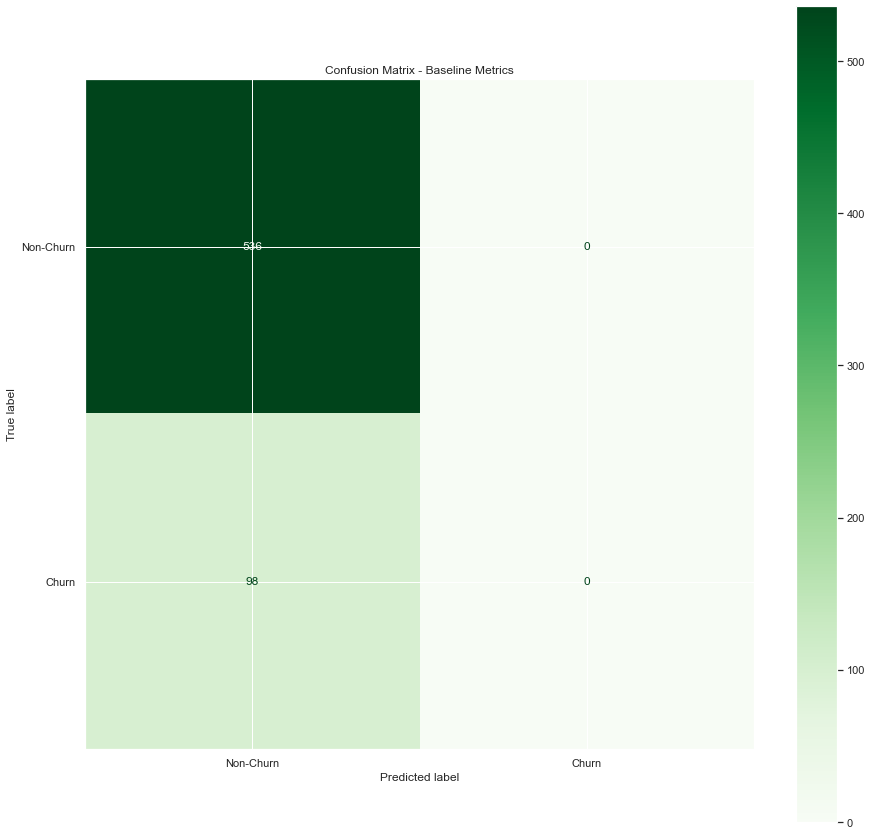

In [49]:
#The confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

majority_class = y_train.mode()[0]
y_pred_baseline = [majority_class] * len(y_test)
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Churn', 'Churn']).plot(cmap='Greens')
plt.title('Confusion Matrix - Baseline Metrics')
plt.show()


In [50]:
#Calculate the baseline accuracy, precision, f1score and recall.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, pos_label=majority_class)
baseline_recall = recall_score(y_test, y_pred_baseline, pos_label=majority_class)
baseline_f1 = f1_score(y_test, y_pred_baseline, pos_label=majority_class)


report = classification_report(y_test, y_pred_baseline)

print(f'Baseline Model Metrics:')
print(f'Accuracy: {baseline_accuracy}')
print(f'Precision: {baseline_precision}')
print(f'Recall: {baseline_recall}')
print(f'F1-Score: {baseline_f1}')

print('Classification Report:')
print(report)

Baseline Model Metrics:
Accuracy: 0.8454258675078864
Precision: 0.8454258675078864
Recall: 1.0
F1-Score: 0.9162393162393162
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       536
           1       0.00      0.00      0.00        98

    accuracy                           0.85       634
   macro avg       0.42      0.50      0.46       634
weighted avg       0.71      0.85      0.77       634



c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

**Logistic Regreesion**

Instantiate and Fit the Logistic Regression model.

In [51]:
#importing the class
from sklearn.linear_model import LogisticRegression
#Instantiate the model
model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state = 42)
#fitting the model on scaled data
model.fit(X_train_new, y_train)
# evaluate performance on the train set
y_pred_train = model.predict(X_train_new)

train_residuals = np.abs(y_train - y_pred_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))


0    1649
1     886
Name: Residuals (counts), dtype: int64

0    0.650493
1    0.349507
Name: Residuals (proportions), dtype: float64


Our model was about 65% correct on the training data.

In [52]:
#evaluate performance on the test set.
y_pred_test = model.predict(X_test_new)

test_residuals = np.abs(y_test - y_pred_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    419
1    215
Name: Residuals (counts), dtype: int64

0    0.660883
1    0.339117
Name: Residuals (proportions), dtype: float64


The model was about 66% correct on the test data.

NOTE: 0 means the prediction and the actual value matched, whereas 1 means the prediction and the actual value did not match.
The accuracies are very close (Ie 65% and 66%); this ia a good sign to show that there's neither underfitting nor overfitting.
But, remember the churn data is imbalanced and we will later review that.

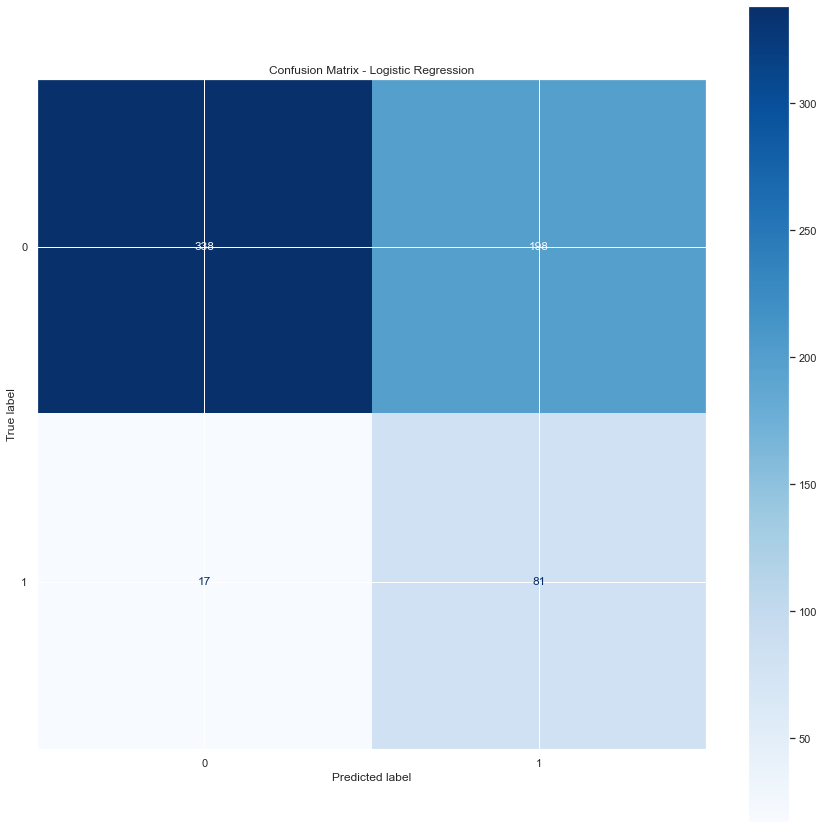

In [53]:
#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


We will go ahead and use cross validation to further evaluate our fitted model.

In [54]:
# Import the function
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_new, y_train, cv=3)
print(cv_scores)
print("Mean_accuracy:", np.mean(cv_scores))

[0.66982249 0.63076923 0.63550296]
Mean_accuracy: 0.6453648915187377


The values are generally close which shows the model is consistent across the subsets. The mean accuray score 64%, which is generally acceptable but we need a higher accuracy.

We can now compare the metrics values for the fitted model and the baseline metrics.

In [55]:
model_accuracy = accuracy_score(y_test, [1] * len(y_test))
model_recall = recall_score(y_test, [1] * len(y_test))
model_precision = precision_score(y_test, [1] * len(y_test))
model_f1 = f1_score(y_test, [1] * len(y_test))

print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f} Fitted Model: {model_f1:1.3f}
""")


Accuracy
Baseline: 0.845 Fitted Model: 0.155
Recall
Baseline: 1.000 Fitted Model: 1.000
Precision
Baseline: 0.845 Fitted Model: 0.155
F1 Score
Baseline: 0.916 Fitted Model: 0.268



The baseline metrics show high accuracy, precision and f1 scores showing generally that the model performs well. The fitted model has very low scores compared to the baseline metrics. It has a poor perfromance showing that it interprets most of positive values incorrectly hence the low scores in accuracy and precision.

**Handling imbalance in the data.**

We will use SMOTE i.e is Synthetic Minority Oversampling. We increase the number of the minority class instances.

In [57]:
from imblearn.over_sampling import SMOTE
# Original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2727
1     442
Name: Churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2191
0    2191
Name: Churn, dtype: int64


In [58]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train_resampled, y_train_resampled)
print(logreg) 

# Predict
y_hat_test = logreg.predict(X_test_new)



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


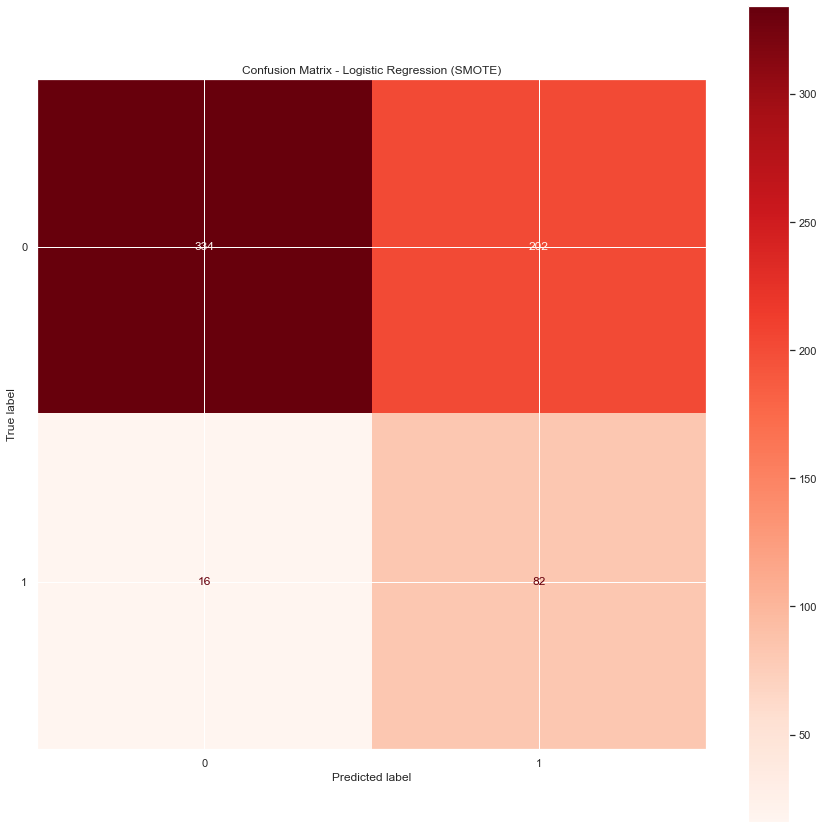

In [59]:
#Compute the confusion matrix for the resampled data
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.show()


In [84]:
class_report = classification_report(y_test, y_hat_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       536
           1       0.29      0.84      0.43        98

    accuracy                           0.66       634
   macro avg       0.62      0.73      0.59       634
weighted avg       0.85      0.66      0.70       634



We will use the ROC and AUC, to evaluate the logistic model after balancing the the dataset.

In [83]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7994593359731954


AUC: 0.7994593359731954


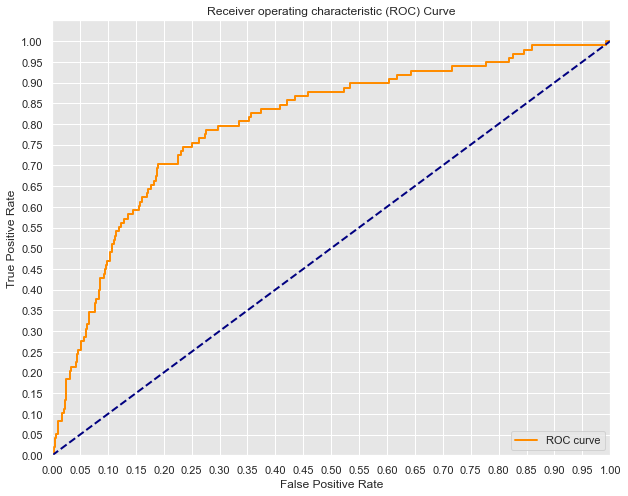

In [61]:
# Visualizing the ROC and AUC for Logistic Regression Smote
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC of 0.79946 demonstrates an outstanding discriminatory power; it is capable of accurately identifying customers who will churn.

**Hypertuning**

Hypertuning parameters is the process of tweaking model parameters to improve its performance. It will help achieve a maximum perfomance. We will tweak the parameters for the SMOTE logistic regression like changing the C intercept values and specifiying the L1 penalty and perform GridSearch with cross validation.

In [103]:
from sklearn.model_selection import GridSearchCV

log1 = LogisticRegression(penalty = 'l1', solver='liblinear',random_state=42)
log1.fit(X_train_resampled,y_train_resampled)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Different values for the inverse of regularization strength
}
#Perform GridSearch with cross validation.
# Set up the grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

print(f'Best C parameter: {grid_search.best_params_}')
print(f'Best AUC: {grid_search.best_score_:.4f}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C parameter: {'C': 100}
Best AUC: 0.8449


In [104]:
from sklearn.metrics import roc_auc_score
#Evaluate the model
# Make predictions on the test set
y_pred = grid_search.predict(X_test_new)
y_pred_prob = grid_search.predict_proba(X_test_new)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       536
           1       0.28      0.83      0.42        98

    accuracy                           0.65       634
   macro avg       0.62      0.72      0.58       634
weighted avg       0.85      0.65      0.69       634

ROC AUC: 0.8005


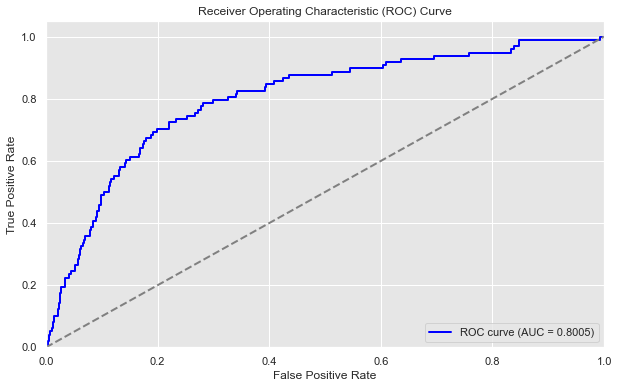

In [105]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

After tuning the parameters, we see the training set , after using different C interceptvalues we get the best parameter combination AUC of 0.8455. On the test set we get an AUC of 0.8004. The slight difference on the AUC shows there's no overfitting. 0.8455 shows that the model has an impressive ability to distinguish between the the churn and no churn within the training dataset. An AUC of 0.8004 on the test set shows that the model generalizes well to the unseen data hence validating the model's use for practical use. It definitely performs better than the original logistic regression mode with the AUC of 0.799945

In [106]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(log1, X_train_resampled, y_train_resampled, n_repeats=10, random_state=42)

# Extract importance scores
importance_scores = perm_importance.importances_mean

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
14        Customer Service Calls    0.087951
22        International Plan_yes    0.087449
21           Voice Mail Plan_yes    0.086353
15                 Total Charges    0.046737
17         Average Call Duration    0.032337
1   Number Of Voicemail Messages    0.027134
4               Total Day Charge    0.019283
12     Total International Calls    0.006458
13    Total International Charge    0.003651
9              Total Night Calls    0.001963
6            Total Evening Calls    0.001575
19                 Encoded State    0.000799
20             Encoded Area Code    0.000183
3                Total Day Calls    0.000068
16                   Total Calls    0.000000
18               Customer Tenure    0.000000
0                 Account Length    0.000000
10            Total Night Charge    0.000000
8            Total Night Minutes    0.000000
7           Total Evening Charge    0.000000
5          Total Evening Minutes    0.000000
2         

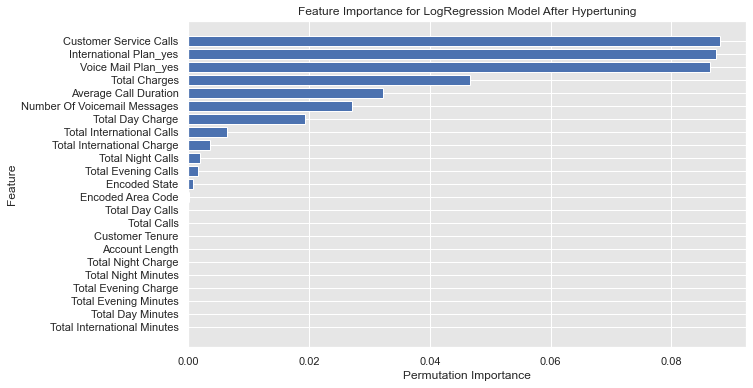

In [107]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for LogRegression Model After Hypertuning')
plt.gca().invert_yaxis()
plt.show()

K-Nearest Neighbours.

This  is a more complex model. It relies on the idea that similar data points tend to have similar labels or values. We will use it to make more predictions and compare the results to the logistic regression.

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the resampled training set
knn.fit(X_train_resampled, y_train_resampled)

# Define the pipeline
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


In [89]:
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC AUC: {best_score}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best ROC AUC: 0.9882564713385434


In [90]:
# Train the final model with the best parameters on the entire training set
final_model = grid_search.best_estimator_

# Evaluate the final model
# Make predictions on the training set
y_train_pred = final_model.predict(X_train_resampled)
y_train_pred_proba = final_model.predict_proba(X_train_resampled)[:, 1]

# Make predictions on the test set
y_test_pred = final_model.predict(X_test_new)
y_test_pred_proba = final_model.predict_proba(X_test_new)[:, 1]


In [91]:

# Generate classification report for training set
print("Classification Report for Training Set:")
print(classification_report(y_train_resampled, y_train_pred))

# Generate classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))




Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00      2191

    accuracy                           1.00      4382
   macro avg       1.00      1.00      1.00      4382
weighted avg       1.00      1.00      1.00      4382

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       536
           1       0.42      0.69      0.52        98

    accuracy                           0.80       634
   macro avg       0.68      0.76      0.70       634
weighted avg       0.86      0.80      0.82       634



In [92]:
#ROC AUC for training set
roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
print(f"AUC for Training Set: {roc_auc_train:.4f}")

# ROC AUC score for test set
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC for Test Set: {roc_auc_test:.4f}")


AUC for Training Set: 1.0000
AUC for Test Set: 0.8256


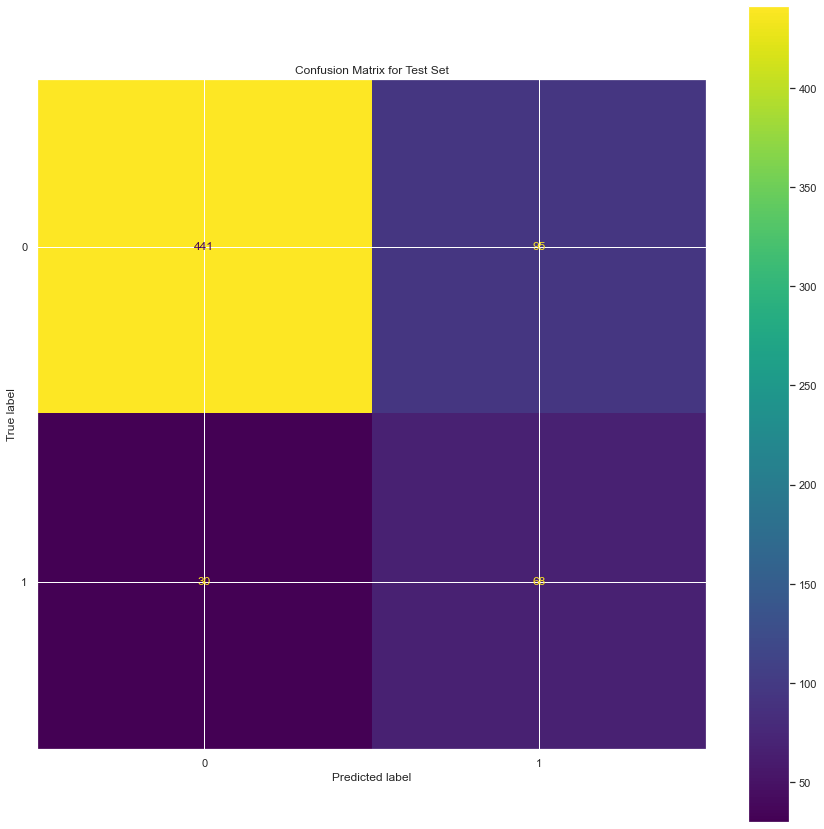

In [93]:

# Plot the confusion matrix for the test set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix for Test Set')
plt.show()


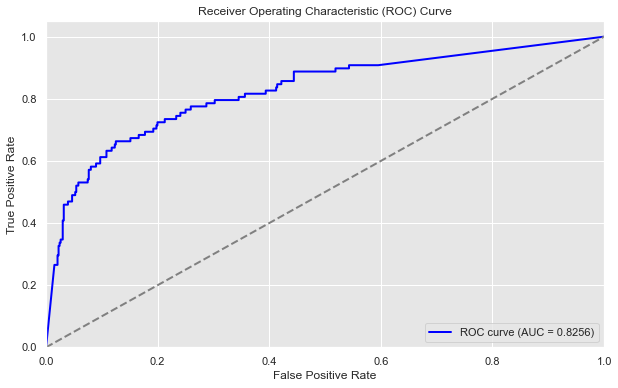

In [94]:

# Plot the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [96]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn, X_train_resampled, y_train_resampled, n_repeats=10, random_state=42)

# Extract importance scores
importance_scores = perm_importance.importances_mean

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
22        International Plan_yes    0.092173
14        Customer Service Calls    0.056709
12     Total International Calls    0.007964
1   Number Of Voicemail Messages    0.006162
21           Voice Mail Plan_yes    0.005568
9              Total Night Calls    0.005431
19                 Encoded State    0.004792
3                Total Day Calls    0.004564
5          Total Evening Minutes    0.004016
7           Total Evening Charge    0.003994
11   Total International Minutes    0.003971
13    Total International Charge    0.003857
18               Customer Tenure    0.003583
0                 Account Length    0.003583
8            Total Night Minutes    0.003400
10            Total Night Charge    0.003355
20             Encoded Area Code    0.002875
6            Total Evening Calls    0.001712
16                   Total Calls    0.000411
17         Average Call Duration    0.000137
15                 Total Charges   -0.001597
2         

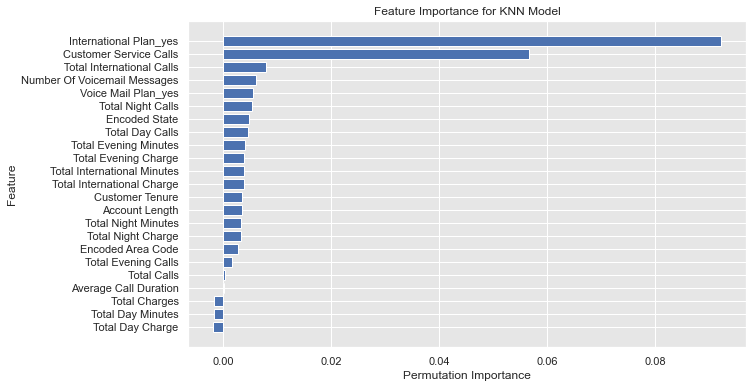

In [99]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for KNN Model')
plt.gca().invert_yaxis()
plt.show()

# **Summary**

For all the models we have used, the results show low scores on the precisions  with the highest being 0.42 ofr the KNN. This means that it can only 42% of the predicted values were correctly classified. It has the highest f1 value of 0.52, while the model with the second highest F1 score is the logistic regression(SMOTE) with a score of 0.43. Tis shows a low imbalance between precision and recall scores.

The model with the highest recall value is logistic(SMOTE)with a score of 0.84. This means that it correctly identified, captured te actual churners in the dataset but at the expense of precision as it has a low precision of 0.29. The classification metrics between the logistic(SMOTE) and logistic(SMOTE) after hypertuning has a slight diference of 0.1.

Recall is more useful for this analysis as we want to actually get the actual positive values. The models best for predicting unseen data are the LogisticRegression(SMOTE) and LogisticRegression(SMOTE) after hypertuning.

If we consider the ROC AUC values, the Logistic Regression after hypertuning showed 0.8449 on the best parameter combination for the training set and 0.80044 on the test set. There is a slight difference and overfitting should not be a big deal. Compared to the KNN, the score was 0.9882 on the best parameter combination on the train set. This showed that it performed really well on the training set. However, as much as it has a 0.8256 AUC score on the test set, which is still good, there is a significant difference between the two scores signifying overfitting.

With these results, the best models to be used to predict the uneen data for churners is the Logistic Regression(SMOTE) and LogisticRegression(SMOTE) after hypertuning.


# **Conclusions**

In Conclusion, our goal was to identify clients which are likely to churn, so we can do special-purpose marketing strategies to avoid the churn event. From the feature importance graphs shown for both of the models, we can see which feataures contribute most to the prediction of the models. The top 4 are Customer Service Calls, International Plan, Voice Mail Plan and Total International Calls. SyriaTel can improve their products by focusing on these features.

**Limitations**

1. Overfitting - The KNN performed well on the train data, but reduced its generalization on the test data.
2. GridSearch with cross validation is time consuming hence could not build more models.
3. Imbalanced Data- SMOTE might not perfectly represent the true distribtuion.
4. Feature Selection method did not really have an effect to the data. It did not reduce the relevant features from the dataset.

**Recommednations.**
1. Use a more updated dataset to reduce the imbalance of data.
2. Use better and more convinient method for feature selection to reducing overfitting.